# Промежуточная аттестация по сетям искусcтвенных нейронов 3.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    




```
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```

1. Визаулизация датасета
2. Предобработка
3. Создайте модель
4. Тренировка модели
5. Оценка модели
6. Обязательно нужны выводы!



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

print("We're using TF", tf.__version__)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

We're using TF 2.17.0


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

##Визуализация:

Пример первых 9 картинок


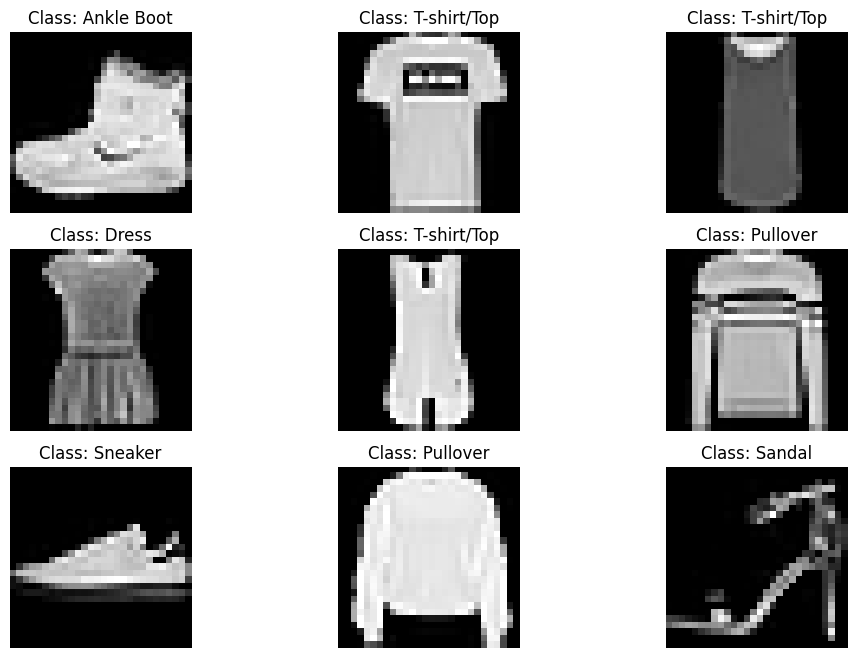

In [ ]:
print('Пример первых 9 картинок')

# Создаем фигуру (область для графиков) размером 12x8 дюймов
plt.figure(figsize=(12, 8))

# Цикл для отображения каждого выбранного изображения
for index in range(9):
    plt.subplot(3, 3, index + 1)
    plt.title('Class: ' + classes[y_train[index]])  # Добавляем заголовок с классом изображения
    plt.axis('off')
    x_train_image = np.tile(x_train[index, :, :].reshape((28, 28, 1)), (1, 1, 3))
    plt.imshow(x_train_image)

# Показываем все изображения на одном графике
plt.show()

##Предобработка:

In [ ]:
# Преобразуем метки в формат one-hot, где для каждого класса создается бинарный вектор длины 10
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

# Вывод информации о форме массива one-hot закодированных меток y_train
print(y_train_oh.shape)

print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [9 0 0 3 0]


In [ ]:
# Нормализация
x_train_float = x_train.astype(float) / 255 - 0.5
x_test_float = x_test.astype(float) / 255 - 0.5

##Создание модели:

In [ ]:
from tensorflow.keras.backend import clear_session

clear_session()

model = M.Sequential()

model.add(L.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(L.BatchNormalization())

model.add(L.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(L.BatchNormalization())
model.add(L.MaxPool2D())
model.add(L.Dropout(0.2))

model.add(L.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(L.BatchNormalization())

model.add(L.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(L.BatchNormalization())

model.add(L.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(L.BatchNormalization())
model.add(L.MaxPool2D())
model.add(L.Dropout(0.2))

model.add(L.Flatten())

model.add(L.Dense(512, activation='relu'))
model.add(L.BatchNormalization())
model.add(L.Dropout(0.3))

model.add(L.Dense(128, activation='relu'))
model.add(L.BatchNormalization())
model.add(L.Dropout(0.3))

model.add(L.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,689,930 (14.08 MB)

 Trainable params: 3,687,626 (14.07 MB)

 Non-trainable params: 2,304 (9.00 KB)

Модель состоит из двух сверточных слоев (64 фильтра, 3*3 ядро свертки, сохранение размерности и активация ReLU) и пулинг слоя, затем идут 3  похожих сверточных слоя (128 фильтров) и пулинг слой. После вытягивания в вектор идут два полносвязных слоя на 512 и 128 нейронов с активацией ReLU. Выходной слой с активацией softmax. Добавлены слои нормализации по батчам и дропаут.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['AUC']
)

##Обучение модели:

In [ ]:
# Обучение модели на тренировочных данных
history = model.fit(
    x_train_float,
    y_train_oh,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_float, y_test_oh)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.7962 - loss: 0.5943 - val_accuracy: 0.9012 - val_loss: 0.2726
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.8959 - loss: 0.2958 - val_accuracy: 0.9071 - val_loss: 0.2511
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9105 - loss: 0.2496 - val_accuracy: 0.9207 - val_loss: 0.2183
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9210 - loss: 0.2206 - val_accuracy: 0.9182 - val_loss: 0.2244
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9259 - loss: 0.2053 - val_accuracy: 0.9157 - val_loss: 0.2229
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9372 - loss: 0.1755 - val_accuracy: 0.9240 - val_loss: 0.2097
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9425 - loss: 0.1596 - val_accuracy: 0.9301 - val_loss: 0.2030
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9431 - loss: 0

##Оценка модели и выводы:

In [ ]:
model.evaluate(x_test_float, y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9419 - loss: 0.1770


[0.18156619369983673, 0.9402999877929688]

Значение accuracy на тестовой выборке составило 94%.

In [ ]:
pred = model.predict(x_test_float)
pred = np.argmax(pred, axis=1)
pred[:10] # Обратим предсказания в удобный вид

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
print(classification_report(y_test, pred, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.88      0.91      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.91      0.91      0.91      1000
       Dress       0.92      0.95      0.94      1000
        Coat       0.89      0.93      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.86      0.78      0.82      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.97      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Самыми точноопределяемыми классами стали Bag, Sandal и Trouser. Precision класса Trouser даже равняется единице, а значит модель ни разу не назвала брюками то, что ими не является. Также легко определялись классы Sandal, и Bag.
Самым трудноопределяемым классом стал класс Shirt.

In [ ]:
(y_test == pred).sum() # Количество верных ответов

9403

In [ ]:
(y_test != pred).sum() # Количество ошибок

597

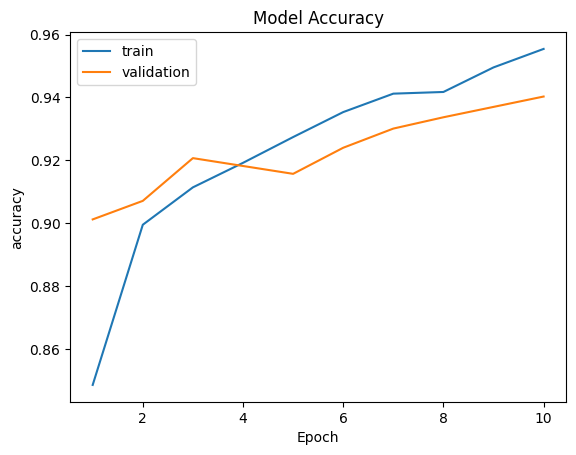

In [ ]:
# График зависимости accuracy от количества эпох
plt.title('Model Accuracy')
plt.plot(range(1,11), history.history['accuracy'])
plt.plot(range(1,11), history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

График оптимальный. Переобучения нет. В теории возможен рост val_accuracy за счет увеличения эпох.

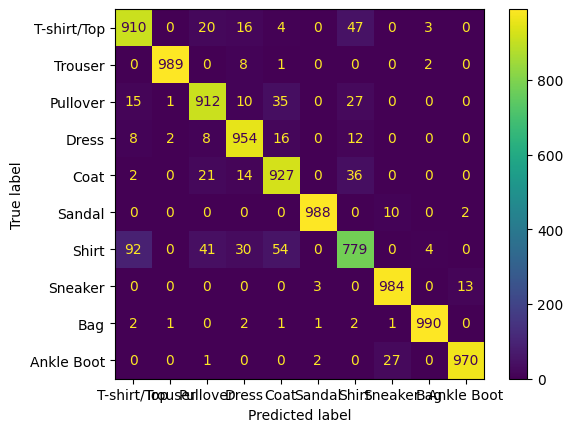

In [ ]:
# Матрица ошибок
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred, labels=range(10)), display_labels=classes)
disp.plot()

Самым точноопределяемым классом стал Bag с точностью в 99%. Самая большая путаница возникала между классами Shirt и T-Shirt/Top.

Пример 16 ошибок


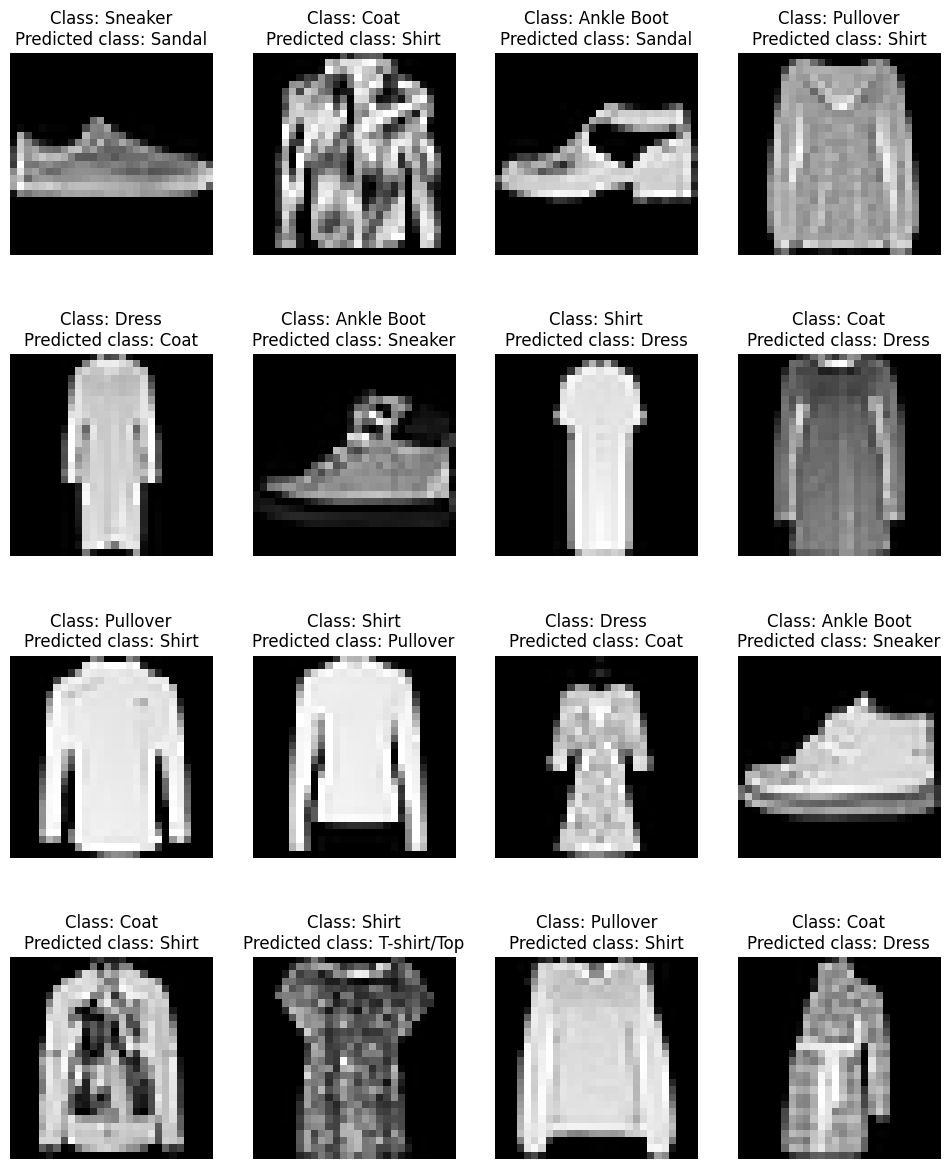

In [ ]:
# Получим индексы ошибочных предсказаний
incorrect = []
for i in range(10000):
  if(not pred[i] == y_test[i]):
    incorrect.append(i)
  if len(incorrect) == 16:
    break

print('Пример 16 ошибок')

plt.figure(figsize=(12, 15))

# Выведем картинки в которых модель ошиблась
for index in range(16):
    plt.subplot(4, 4, index + 1)
    plt.title('Class: ' + classes[y_test[incorrect[index]]] + '\nPredicted class: ' + classes[pred[incorrect[index]]])
    plt.axis('off')
    x_train_image = np.tile(x_test[incorrect[index], :, :].reshape((28, 28, 1)), (1, 1, 3))
    plt.imshow(x_train_image)


plt.show()

## Результат работы:
Визуализированы и предобработаны данные, создана и обучена модель CNN с приемлемыми результатами. На их основе построены графики и сделаны выводы.